# OLD
### Fill cabin base on PassengerGroup

In [ ]:
(df['Cabin']).isna().sum()

KeyError: 'Cabin'

In [ ]:
# 1️⃣ Identify groups with exactly one known Cabin
valid_groups = (
    df[df['Cabin'].notna()]
    .groupby('PassengerGroup')['Cabin']
    .nunique()
)

valid_groups = valid_groups[valid_groups == 1].index

# 2️⃣ Fill missing Cabin using PassengerGroup
df.loc[
    df['Cabin'].isna() &
    df['PassengerGroup'].isin(valid_groups),
    'Cabin'
] = (
    df.groupby('PassengerGroup')['Cabin']
      .transform('first')
)

In [ ]:
(df['Cabin']).isna().sum()

112

***

In [ ]:
for d in [df]:
    d[['Deck','CabinNum','Side']] = d['Cabin'].str.split('/', expand=True) # split Cabin to- Deck, CabinNum and Side
    d[['PassengerGroup','PassengerIdNum']] = d['PassengerId'].str.split('_', expand=True) # split PassengerId to- PassengerGroup and PassengerIdNum
    d[['FirstName','LastName']] = d['Name'].str.split(' ', expand=True) # split Name to- FirstName and LastName

# Fill missing values with 'Missing' label
# Cabin has NaN so fillna    
df.fillna({'Deck': 'MissingDeck'}, inplace=True)
df.fillna({'CabinNum': 'MissingCabinNum'}, inplace=True)
df.fillna({'Side': 'MissingSide'}, inplace=True)
# Name has NaN so fillna
df.fillna({'FirstName': 'MissingFirstName'}, inplace=True)
df.fillna({'LastName': 'MissingLastName'}, inplace=True)

df.drop(columns=['Cabin', 'PassengerId', 'Name'], inplace=True)

df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerGroup,GroupSize,Deck,CabinNum,Side,PassengerIdNum,FirstName,LastName
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001,1,B,0,P,01,Maham,Ofracculy
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0002,1,F,0,S,01,Juanna,Vines
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0003,2,A,0,S,01,Altark,Susent
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0003,2,A,0,S,02,Solam,Susent
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0004,1,F,1,S,01,Willy,Santantines


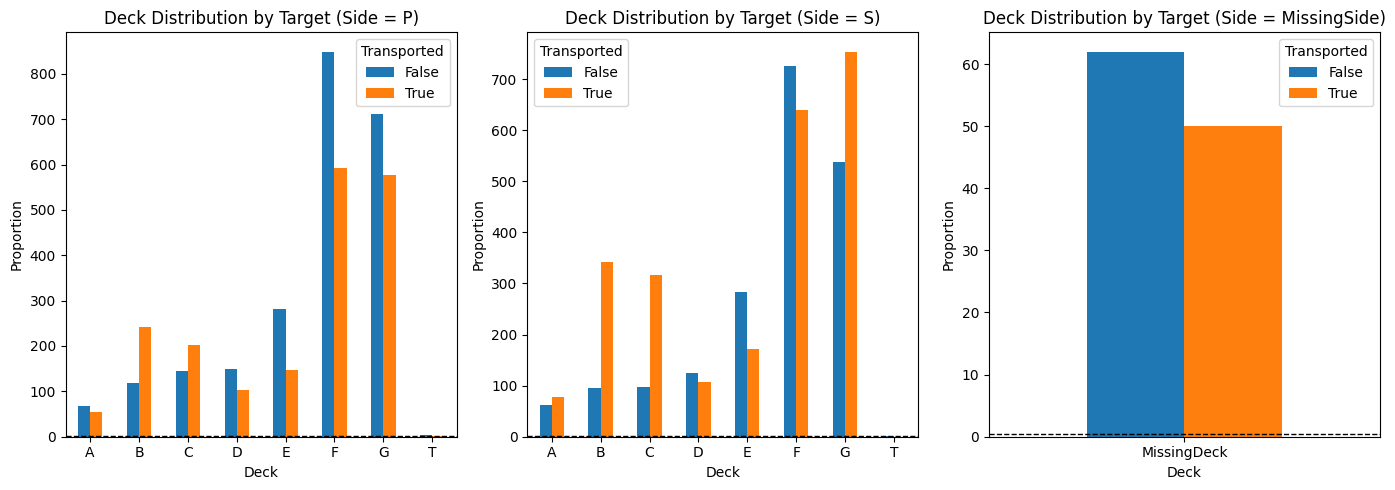

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(14, 5))

for ax, side in zip(axes, ["P", "S", "MissingSide"]):
    df_side = df[df["Side"] == side]
    # Create contingency table of Deck vs Target
    ct = pd.crosstab(
        df_side["Deck"],
        df_side[target],
    )

    ct.plot(
        kind="bar",
        stacked=False,
        ax=ax
    )

    ax.set_title(f"Deck Distribution by Target (Side = {side})")
    ax.set_xlabel("Deck")
    ax.set_ylabel("Proportion")
    ax.axhline(0.5, color="black", linestyle="--", linewidth=1)
    ax.tick_params(axis="x", rotation=0)

plt.tight_layout()
plt.show()

From the plots above we can infer couple of things:
1) Cabins 'G' and 'A' have different majority based on the side of the deck; alluding to mix those features.
2) Other Cabins has likely the same majority on each side of the deck; we may want examine mix it.
3) Missing Cabin information rows has equally split; we have no major decision for those with Missing Cabin.

so next, we'll examine the shown of the mixing Deck+Side effect.

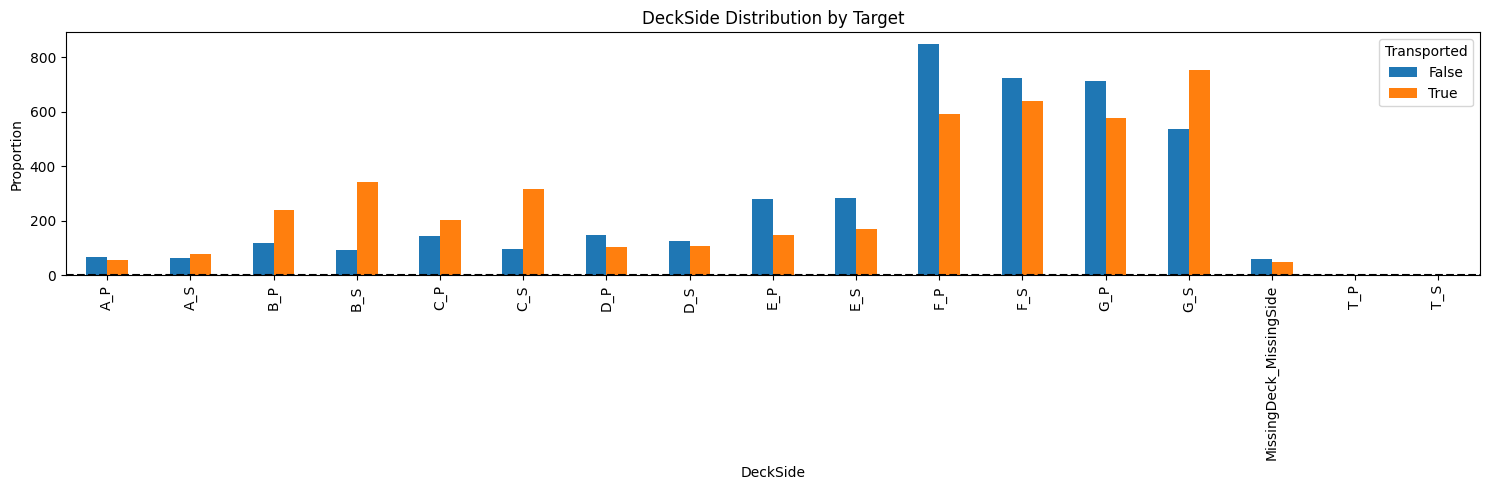

In [ ]:
df["DeckSide"] = df["Deck"] + "_" + df["Side"]

ct = pd.crosstab(
    df["DeckSide"],
    df[target],
)

ct.plot(kind="bar", stacked=False, figsize=(15, 5))
plt.axhline(0.5, color="black", linestyle="--")
plt.ylabel("Proportion")
plt.title("DeckSide Distribution by Target")
plt.tight_layout()
plt.show()

Several decks show opposite tendencies depending on cabin side, such as **Deck B** and **Deck C**, where the **S side** has a higher transported rate than the **P side**. The side dependency indicates the interaction between **Deck** and **Side**, justifying their combination into a single feature.

In [ ]:
df.drop(columns=['Deck', 'Side'], inplace=True)
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerGroup,GroupSize,CabinNum,PassengerIdNum,FirstName,LastName,DeckSide
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001,1,0,01,Maham,Ofracculy,B_P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0002,1,0,01,Juanna,Vines,F_S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0003,2,0,01,Altark,Susent,A_S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0003,2,0,02,Solam,Susent,A_S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0004,1,1,01,Willy,Santantines,F_S


***AI [1]***

In [ ]:
df['TotalSpending'] = df[spending_cols].sum(axis=1)
print(df['TotalSpending'].isna().sum())

In [ ]:
# Rows where CryoSleep=True and any spending is non-zero or NaN --> set spending to 0
# Set spending to 0 for these rows
spending_miss_before = df[spending_cols].isna().sum()

df.loc[df['CryoSleep'] == True, spending_cols] = 0

print(spending_miss_before,"\n")
print(df[spending_cols].isna().sum())

RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
dtype: int64 

RoomService     113
FoodCourt       113
ShoppingMall    112
Spa             118
VRDeck          126
dtype: int64


In [ ]:
# Rows where CryoSleep=NaN if there is any spending non-zero --> CryoSleep=False
# Set CryoSleep to False for these rows
df.loc[df['CryoSleep'].isna() & (df[spending_cols].fillna(0).sum(axis=1) != 0), 'CryoSleep'] = False

## Succeed Fill All Cabin_decks ##
***
from now on its an extention:

Cabin Deck vs Cabin side distribution:

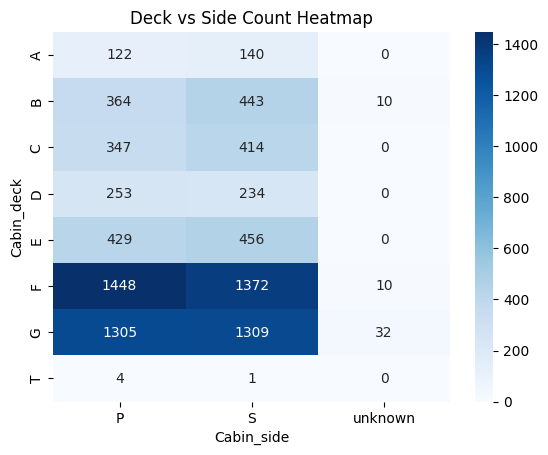

In [ ]:
ct = pd.crosstab(df['Cabin_deck'], df['Cabin_side'])

sns.heatmap(ct, annot=True, fmt='d', cmap='Blues')
plt.title('Deck vs Side Count Heatmap')
plt.show()


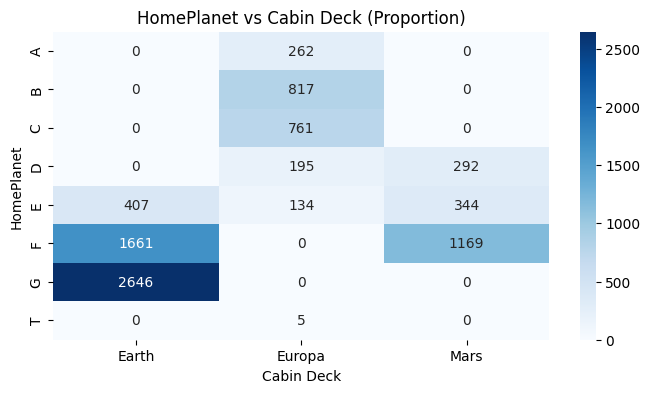

In [ ]:
ct = pd.crosstab(
    df['Cabin_deck'],
    df['HomePlanet']
)

plt.figure(figsize=(8,4))
sns.heatmap(ct, annot=True, fmt='d', cmap='Blues')
plt.title('HomePlanet vs Cabin Deck')
plt.xlabel('Cabin Deck')
plt.ylabel('HomePlanet')
plt.show()


G and F are the majors decks, we have seen from 'HomePlanet' feature that the majority from Mars placed on deck 'F' (Non in 'G'), the majority from Earth placed on deck 'G' (less on 'F'). We also remember that most of the passenger's destination is 'Trappist' and most of them from 'Earth'.
we'll groupby those features:

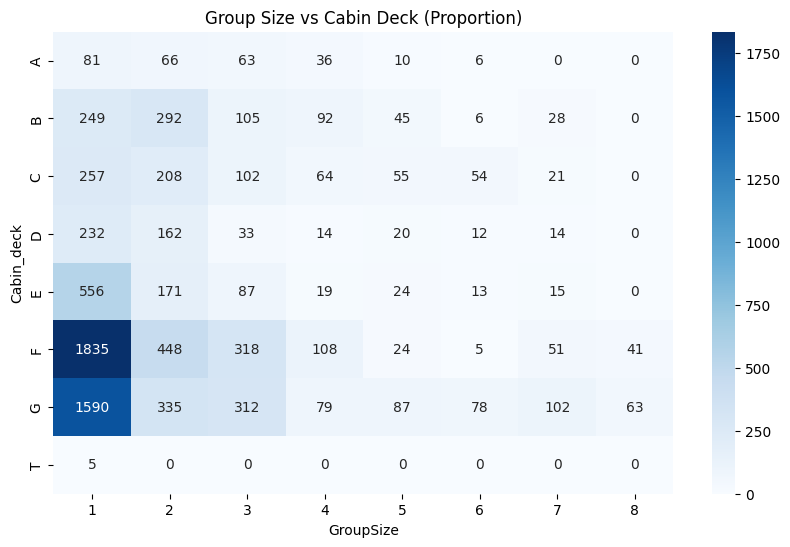

In [ ]:
ct = pd.crosstab(
    df['Cabin_deck'],
    df['GroupSize'],
)

plt.figure(figsize=(10,6))
sns.heatmap(ct, annot=True, fmt='d', cmap='Blues')
plt.title('Group Size vs Cabin Deck (Proportion)')
plt.show()


Text(0.5, 1.0, 'Cabin deck vs Last name')

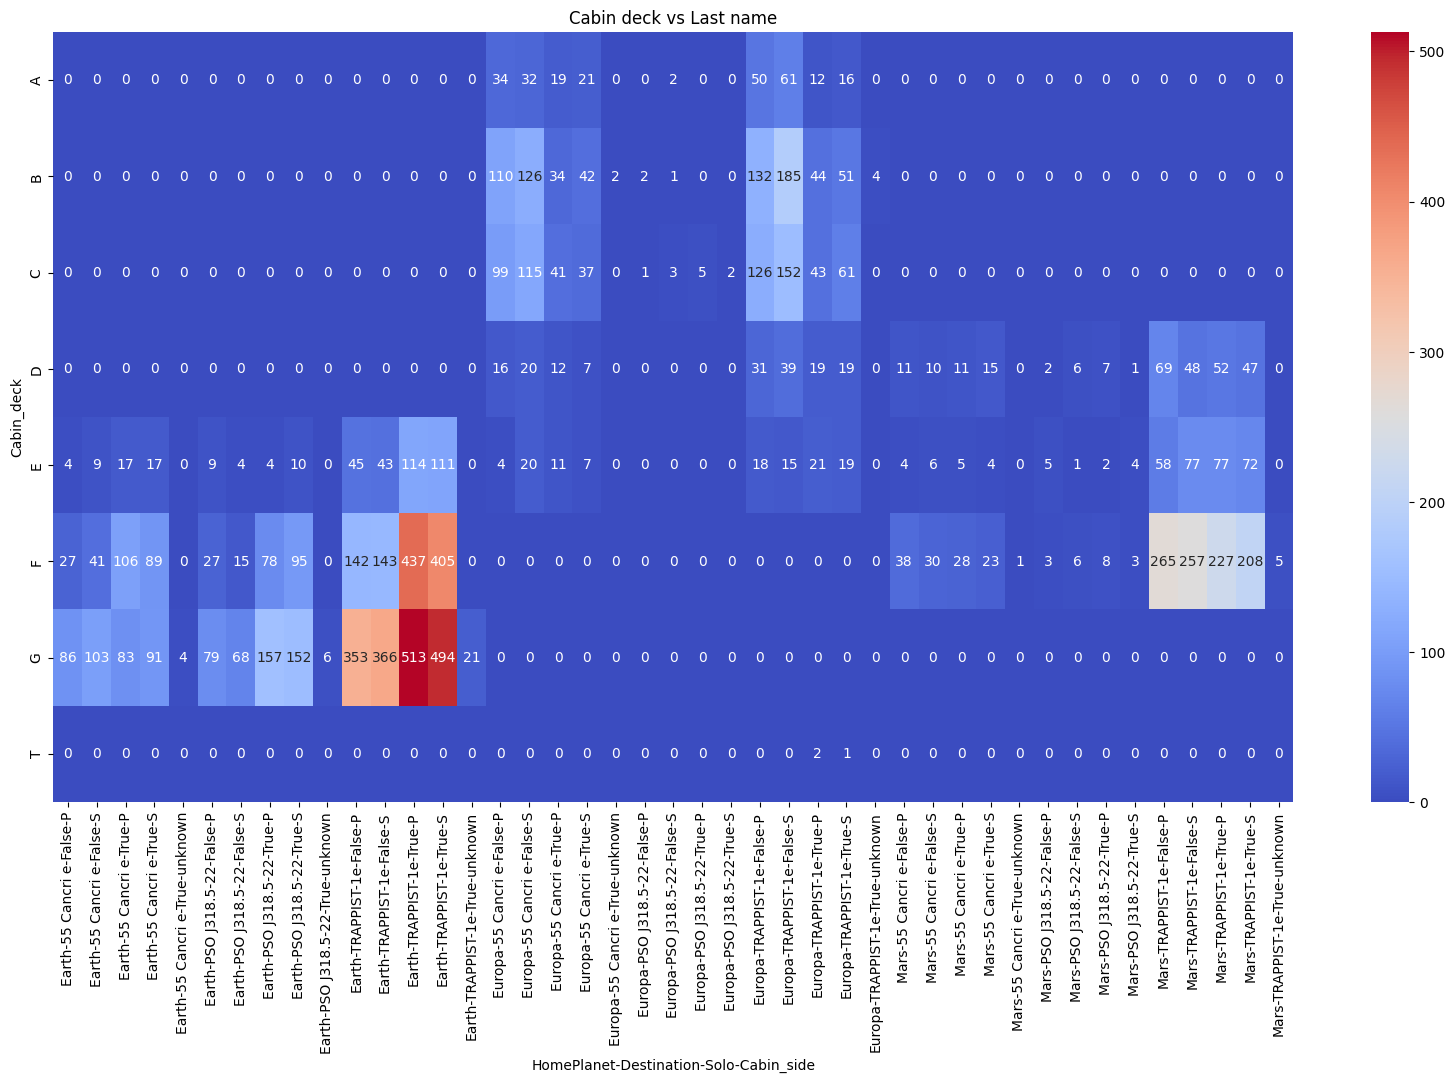

In [ ]:
# Joint distribution of Surname and Cabin side
SCS_gb=df[df['Family_size']>1].groupby(['HomePlanet', 'Destination', 'Solo', 'Cabin_side', 'Cabin_deck'])['Cabin_deck'].size().unstack().fillna(0)
plt.figure(figsize=(20,10))
sns.heatmap(SCS_gb.T, annot=True, fmt=".0f", cmap='coolwarm')
plt.title('Cabin deck vs Last name')

In [ ]:
# Group size per PassengerGroup
df['GroupSize'] = df.groupby('PassengerGroup')['PassengerGroup'].transform('count')


In [ ]:
ct = pd.crosstab(
    df['GroupSize'],
    df['Cabin_deck']
)

ct

Cabin_deck,A,B,C,D,E,F,G,T
GroupSize,,,,,,,,
1,81,249,257,232,556,1835,1590,5
2,66,292,208,162,171,448,335,0
3,63,105,102,33,87,318,312,0
4,36,92,64,14,19,108,79,0
5,10,45,55,20,24,24,87,0
6,6,6,54,12,13,5,78,0
7,0,28,21,14,15,51,102,0
8,0,0,0,0,0,41,63,0


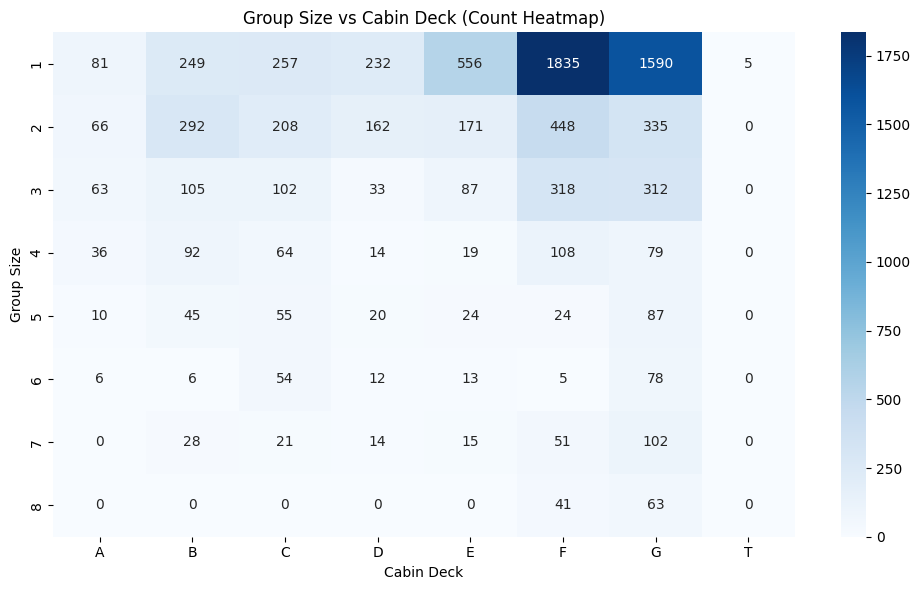

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(
    ct,
    annot=True,
    fmt='d',
    cmap='Blues'
)
plt.xlabel('Cabin Deck')
plt.ylabel('Group Size')
plt.title('Group Size vs Cabin Deck (Count Heatmap)')
plt.tight_layout()
plt.show()